In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from lib import plot_decision_regions

## Training a Perceptron using scikit-learn

In [3]:
# Load Iris dataset
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
# select only 2 features: petal length and petal width
# feature matrix
X = iris.data[:, [2, 3]]
# target vector, species Setosa, Versicolor and Virginica stored
# as 0, 1, 2 respectively
y = iris.target

In [4]:
# Split into training and testing datasets
from sklearn.cross_validation import train_test_split
# randomly split X and y into 30% test and 70% training data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=0)

In [5]:
# Feature scaling for optimal performance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# estimate mean and std deviation of each feature dimension
# can be verified in sc.mean_ and sc.scale_ attributes
sc.fit(X_train)
# standardize features
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
# Train perceptron model
from sklearn.linear_model import Perceptron
# n_iter is the number of epochs, eta0 the learning rate
# random_state for reproducibility of the initial shuffling after
# each epoch
# experimentation is needed to find optimal learning rate
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [7]:
# predict classes of test samples and compare to
# their actual classes
y_pred = ppn.predict(X_test_std)
misclassified_samples = (y_test != y_pred).sum()
print('Misclassified samples: %d' % misclassified_samples)
misclassification_error = misclassified_samples/len(X_test)
print('Misclassification error: %.3f' % misclassification_error)
accuracy = 1 - misclassification_error
print('Accuracy: %.3f' % accuracy)

Misclassified samples: 4
Misclassification error: 0.089
Accuracy: 0.911


In [8]:
# accuracy metrics via sklearn
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


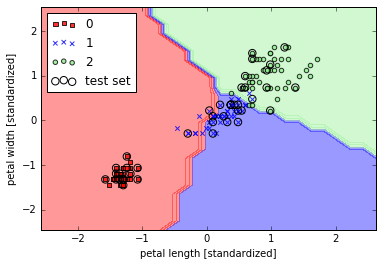

In [9]:
# Plot results
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()
# the three classes cannot be separated perfectly by linear
# decision boundaries
# the perceptron never converges on datasets that are not linearly
# separable and is therefore not recommended in practice

## Class probabilities via logistic regression

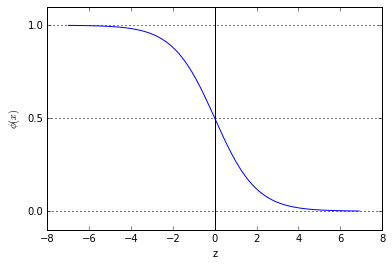

In [10]:
# plotting the sigmoid function
sigmoid = lambda z: 1.0/(1.0 + np.exp(z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (x)$')
plt.show()

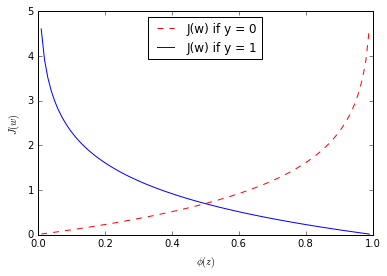

In [11]:
# cost function that needs to be minimized when training a
# logistic regression model
# this plots the function for one sample
# in training the cost is summed over all samples
def cost_fn(phi_z, y):
    return -y * np.log(phi_z) - (1-y) * np.log(1-phi_z)

phi_z = np.arange(0, 1, 0.01)
cost_y0 = cost_fn(phi_z, 0)
cost_y1 = cost_fn(phi_z, 1)
plt.plot(phi_z, cost_y0, color='r', 
         ls='dashed', label='J(w) if y = 0')
plt.plot(phi_z, cost_y1, color='b',
        label='J(w) if y = 1')
plt.xlabel('$\phi(z)$')
plt.ylabel('$J(w)$')
plt.legend(loc='upper center')
plt.show()

# the cost approaches 0 if we correctly predict that sample
# belong to class 1 (blue line). Cost approaches 0 if we
# correctly predict y = 0 (red dashed line). Cost approaches
# infinity in wrong predictions


### training linear regression with sklearn

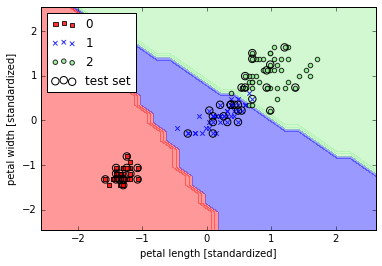

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined, classifier=lr,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [13]:
# predict class membership probability of first Setosa sample
prs = lr.predict_proba(X_test_std[0,:])
# 93.7% for veriscolor, 6.3% for virginica, 0% setosa
print(prs)

[[  2.05743774e-11   6.31620264e-02   9.36837974e-01]]


/home/ubuntu/workspace/venv/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


### tackling overfitting with regularization

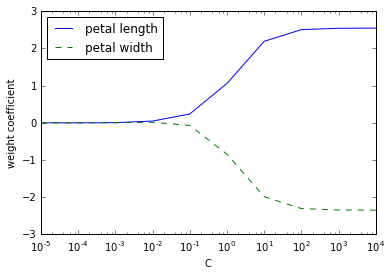

In [14]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1]) # weights for class 2
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
        label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
        label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

### support vector machine

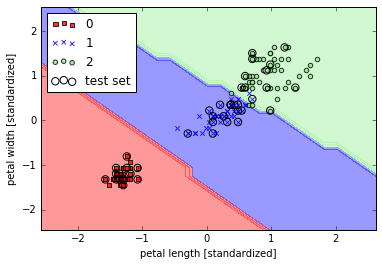

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined, classifier=svm,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### solving nonlinear problems using a kernel SVM

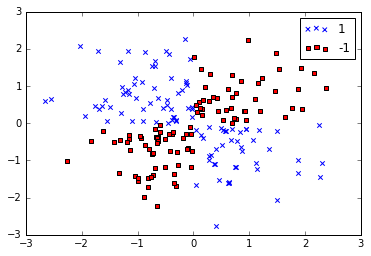

In [16]:
# To illustrate nonlinear separable data, create a simple
# dataset with form of an XOR gate
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
           c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
           c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

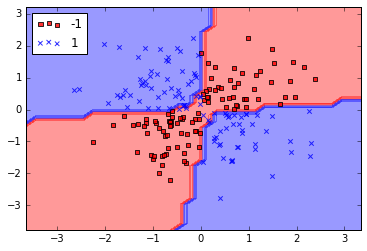

In [17]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

increasing the `gamma` parameter increases the influence or
reach of the training samples, leading to a less softer decision
boundary

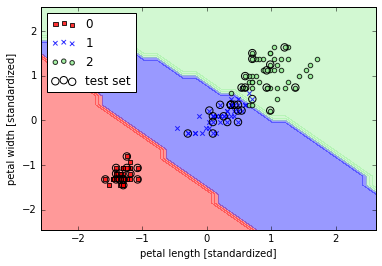

In [18]:
# using an rbf kernel on Iris dataset
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined, classifier=svm,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


since we chose a small value for `gamma`, the decision boundary is relatively small

let's increase the value of `gamma` and observe the effects

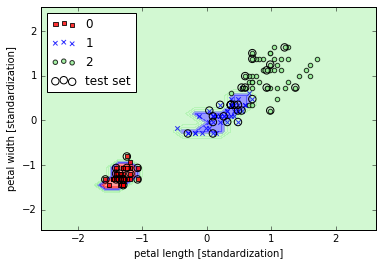

In [19]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined, classifier=svm,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardization]')
plt.ylabel('petal width [standardization]')
plt.legend(loc='upper left')
plt.show()

as we can see, the decision boundary around the classes 0 and 1 is much tighter using a relatively large value of `gamma`

**Note**: Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseend data, which illustrates that the optimisation of `gamma` plays an important role in controlling overfitting

## Decision Trees

### Comparing different impurity criteria

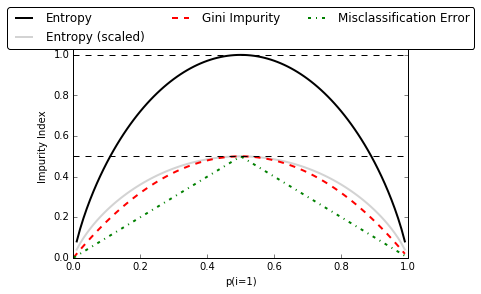

In [20]:
# p is the proportion of samples in class label 1
def gini(p):
    """gini index"""
    return p*(1-p) + (1-p)*(1 - (1-p))

def entropy(p):
    """entropy"""
    return - p*np.log2(p) - (1-p)*np.log2(1-p)

def error(p):
    """misclassfication error"""
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
# entropy values
ent = [entropy(p) if p != 0 else None for p in x]
# scaled entropy values
sc_ent = [e*0.5 if e else None for e in ent]
# misclassification error values
err = [error(p) for p in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)',
                         'Gini Impurity',
                         'Misclassification Error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray',
                         'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, 
                   linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
         ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()


The scaled version of the entropy `entropy/2` has been added to show that the Gini index is an intermediate measure between entropy and classification error.

### building a decision tree

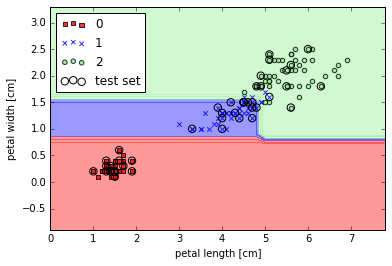

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                             max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                     classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

generate graphviz dot file of trained decision tree

In [22]:
from sklearn.tree import export_graphviz
export_graphviz(tree,
               out_file='tree.dot',
               feature_names=['petal length', 'petal width'])

### random forest

a random forest is an ensemble classifier that combines multiples decision trees. Each is trained on a random subset of size **`n`** of the training set, with **`d`** random features used to grow the tree. The process is repeated **`k`** times. The predictions by each tree are aggregated to assign a class label by **majority vote**

Random forests are more robust and less prone to overfitting than an individual decision tree

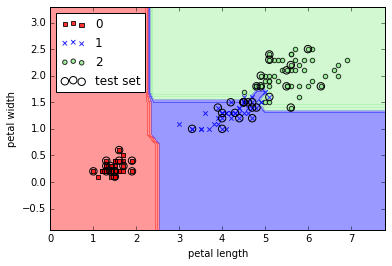

In [23]:

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=10,
                               random_state=1,
                               n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                     classifier=forest,
                     test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

The random forest above is trained from 10 decision trees (`n_estimators=10`), using entropy as an impurity measure to split the nodes. The **`n_jobs`** is used to parallelize the model training, in this case using 2 cores.

## k-Nearest Neighbors classifier

How a kNN algorithm works:
1. Define of **`k`** (number of neighbors to consider) and a distance metric
2. Find the k nearest neighbors of the sample we want to classify based on the distance metric
3. Assign the class label by majority vote

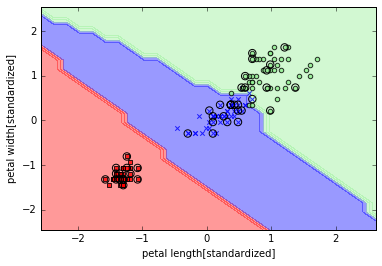

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                          metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                     classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.show()

In the above example we use 5 neighbours which results in smooth decision boundaries. Choosing the right value for k is crucial to avoid overfitting.
The metric `minkowski` is a generalization of the Euclidean, Manhattan and similar distances. Setting **`p=2`** is equivalent to using Euclidean distance.

Euclidean distance is suitable for real-valued features, like the petal dimensions, measured in cm. It is important to standardize the data so that each feature contributes equally to the distance.